In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# open the .txt file here in the csv format
df = pd.read_csv('KDDTrain+.csv',header=None)

# show all the columns
pd.set_option('display.max_columns', None)

# got from Kaggle NB
df.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level']
     

In [3]:
print(df.shape)
df.head()

(125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
# Define attack types and their corresponding classes
attack_type = ['normal', 'back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 'loadmodule',
                'multihop', 'neptune', 'nmap', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan', 'smurf',
                'spy', 'teardrop', 'warezclient', 'warezmaster']

attack_class = ['normal', 'dos', 'u2r', 'r2l', 'r2l', 'r2l', 'probe', 'dos', 'u2r', 'r2l', 'dos', 'probe', 'u2r', 'r2l',
                'dos', 'probe', 'u2r', 'probe', 'dos', 'r2l', 'dos', 'r2l', 'r2l']

# Ensure the lists are correctly aligned
attack_mapping = dict(zip(attack_type, attack_class))

In [5]:
# Map the attack types to the attack class using a dictionary
df['attack_class'] = df['outcome'].map(attack_mapping)

# change the name of the outcome column as attack_type
df.rename(columns={'outcome':'attack_type'}, inplace=True)

# add new variables class label (binary)) and attack type (multi-class), attack class (multi-class)
df['class_label'] = df.attack_class.apply(lambda v: 0 if v=='normal' else 1)

# Display the first few rows of the DataFrame
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,level,attack_class,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0


In [6]:
df['attack_class'].value_counts()

attack_class
normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64

In [7]:
df.groupby('attack_class')['attack_type'].value_counts()

attack_class  attack_type    
dos           neptune            41214
              smurf               2646
              back                 956
              teardrop             892
              pod                  201
              land                  18
normal        normal             67343
probe         satan               3633
              ipsweep             3599
              portsweep           2931
              nmap                1493
r2l           warezclient          890
              guess_passwd          53
              warezmaster           20
              imap                  11
              ftp_write              8
              multihop               7
              phf                    4
              spy                    2
u2r           buffer_overflow       30
              rootkit               10
              loadmodule             9
              perl                   3
Name: count, dtype: int64

In [8]:
print(df.shape)
df.head()

(125973, 45)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,level,attack_class,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0


In [9]:
# drop the num_outbound_cmds column as it has only one value
df.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [10]:
# made a copy of original dataframe
df_copy = df.copy()
# save the data as a csv file
df.to_csv('NSL_KDD_Train_labeled_preprocessed.csv', index=False)

df_filtered = df[df['attack_class'] != 'normal']
df_filtered.to_csv('NSL_KDD_Train_labeled_preprocessed_filtered.csv', index=False)

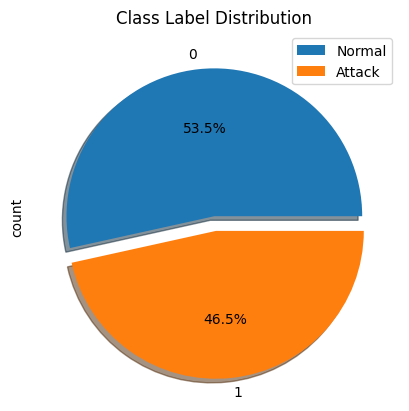

In [11]:
# visualization of class_label in a pie chart with percentages and labels i.e., 0 = normal anbd 1 = attack
# plt.figure(figsize=(10,10))
df['class_label'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0,0.1])
#replace the labels with normal and attack instead of 0 and 1
plt.legend(['Normal','Attack'])
plt.title('Class Label Distribution')
plt.show()

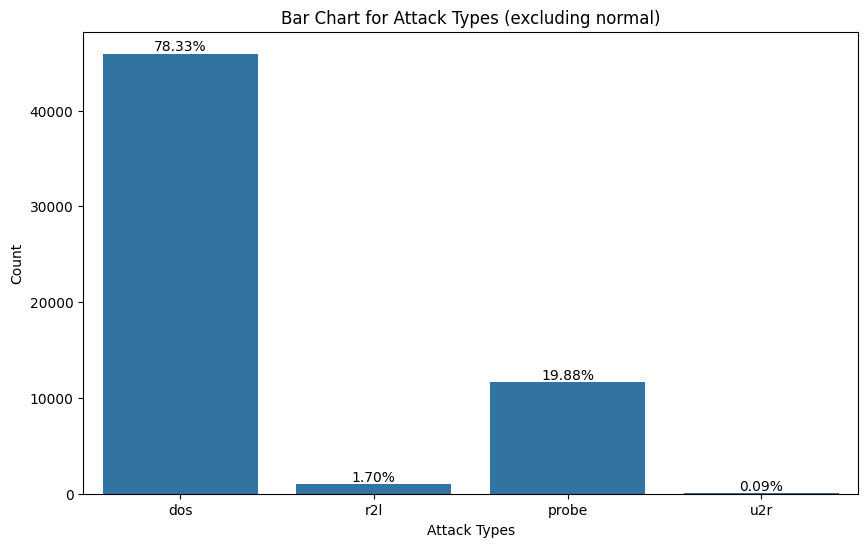

In [12]:
# Create a countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_filtered, x='attack_class')

# Calculate percentages manually
total = len(df_filtered)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height / total:.2%}', ha='center', va='bottom')

# Customize the chart
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.title('Bar Chart for Attack Types (excluding normal)')

# Show the plot
plt.show()

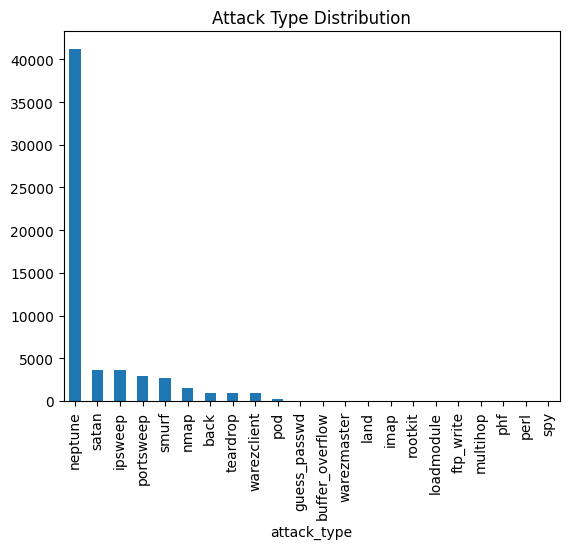

In [13]:
# bar chart of attack type and attack class
#plt.figure(figsize=(10,10))
df_filtered['attack_type'].value_counts().plot.bar()
plt.title('Attack Type Distribution')
plt.show()

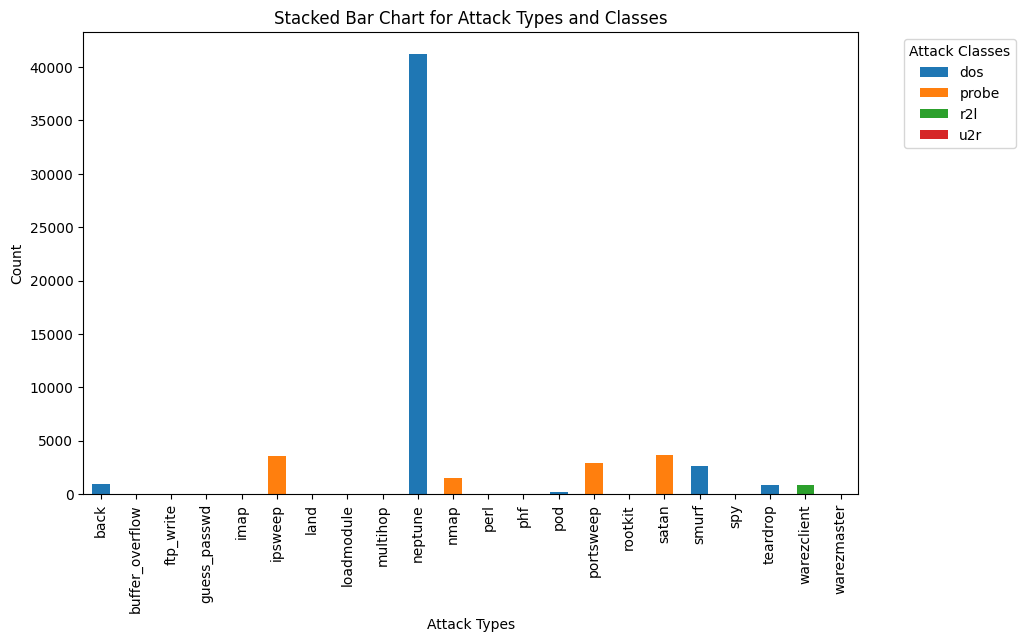

In [14]:
# Create a contingency table (cross-tabulation) between the two categorical variables
contingency_table = pd.crosstab(df_filtered['attack_type'], df_filtered['attack_class'])

# Plot the stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.title('Stacked Bar Chart for Attack Types and Classes')
plt.legend(title='Attack Classes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [15]:
# show the percentage of each attack type
df_filtered['attack_type'].value_counts(normalize=True)*100

attack_type
neptune            70.295071
satan               6.196486
ipsweep             6.138496
portsweep           4.999147
smurf               4.513048
nmap                2.546478
back                1.630565
teardrop            1.521405
warezclient         1.517994
pod                 0.342828
guess_passwd        0.090397
buffer_overflow     0.051168
warezmaster         0.034112
land                0.030701
imap                0.018762
rootkit             0.017056
loadmodule          0.015351
ftp_write           0.013645
multihop            0.011939
phf                 0.006822
perl                0.005117
spy                 0.003411
Name: proportion, dtype: float64

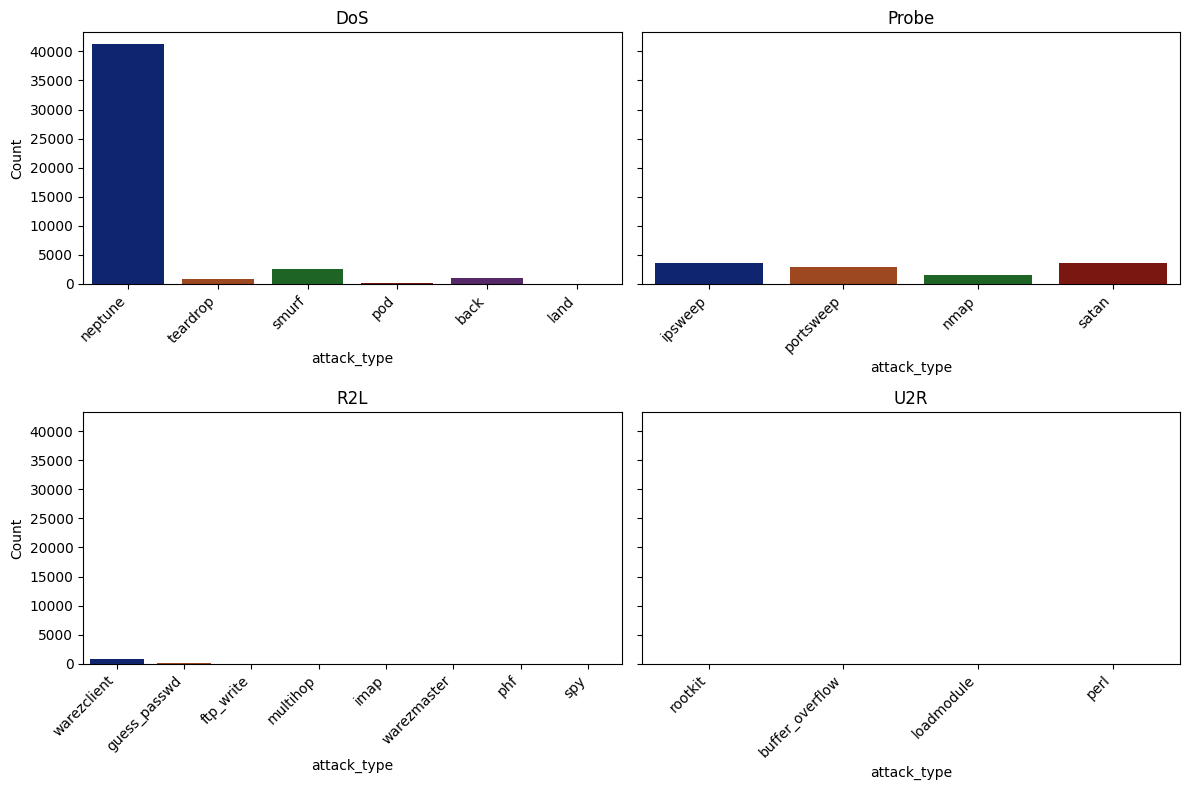

In [16]:
# Create subplots for each attack class
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

# Plot and format the first subplot
sns.countplot(data=df[df['attack_class'] == 'dos'], x='attack_type', ax=ax[0, 0], palette='dark')
ax[0, 0].set_title('DoS')
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Plot and format the second subplot
sns.countplot(data=df[df['attack_class'] == 'probe'], x='attack_type', ax=ax[0, 1], palette='dark')
ax[0, 1].set_title('Probe')
ax[0, 1].set_ylabel('Count')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Plot and format the third subplot
sns.countplot(data=df[df['attack_class'] == 'r2l'], x='attack_type', ax=ax[1, 0], palette='dark')
ax[1, 0].set_title('R2L')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Plot and format the fourth subplot
sns.countplot(data=df[df['attack_class'] == 'u2r'], x='attack_type', ax=ax[1, 1], palette='dark')
ax[1, 1].set_title('U2R')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
# From here we can see that around 70% attacks are just the neptune attack (DOS) attack so the top 5 attacks are:
# Neptune
# Satan
# Ipsweep
# portsweep
# smurf

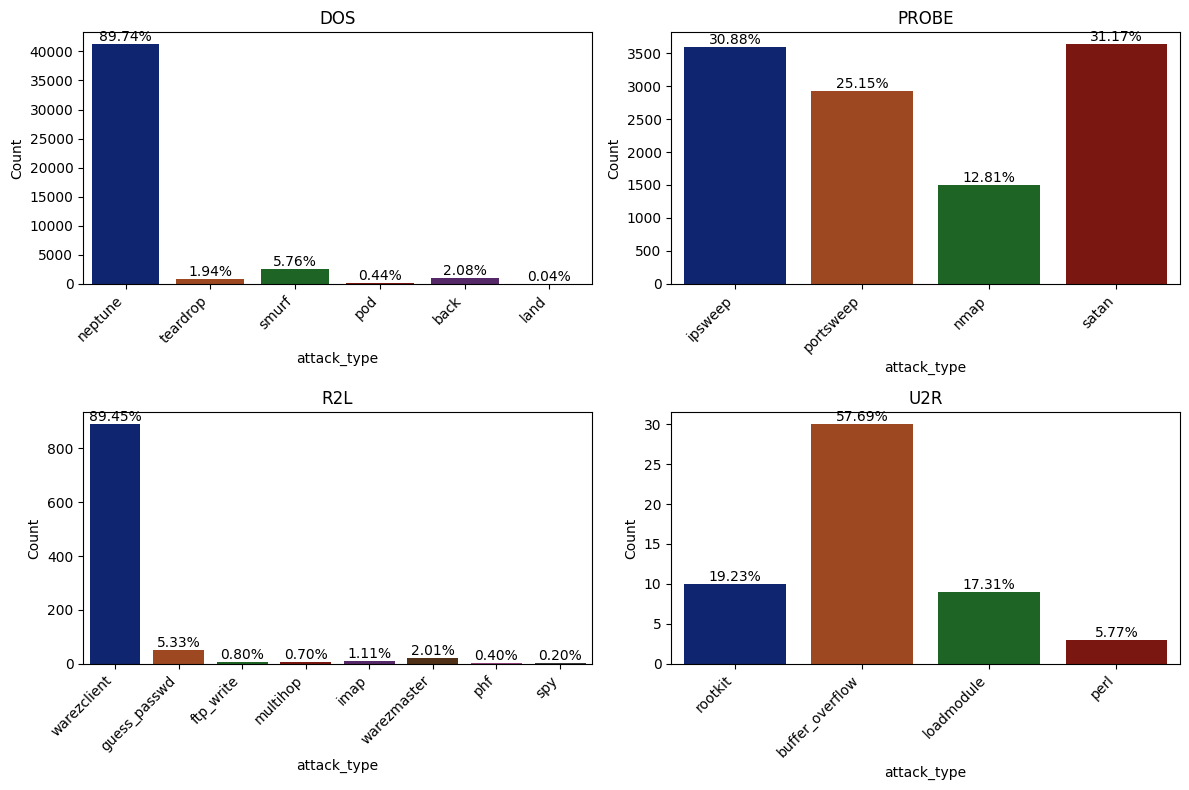

In [18]:
# Create subplots for each attack class
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# List of attack classes
attack_classes = ['dos', 'probe', 'r2l', 'u2r']

for i, attack_class in enumerate(attack_classes):
    # Plot countplot for each attack class
    sns.countplot(data=df[df['attack_class'] == attack_class], x='attack_type', ax=ax[i // 2, i % 2], palette='dark')
    ax[i // 2, i % 2].set_title(attack_class.upper())
    ax[i // 2, i % 2].set_ylabel('Count')
    ax[i // 2, i % 2].set_xticklabels(ax[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

    # Calculate percentages manually
    total = len(df[df['attack_class'] == attack_class])
    for p in ax[i // 2, i % 2].patches:
        height = p.get_height()
        ax[i // 2, i % 2].text(p.get_x() + p.get_width() / 2., height, f'{height / total:.2%}', ha='center', va='bottom')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# From this we can see that the top category of attack within all of the four attacks:
# DOS has Neptune
# Probe has satan
# R2L has warezclient
# U2R has buffer_overflow

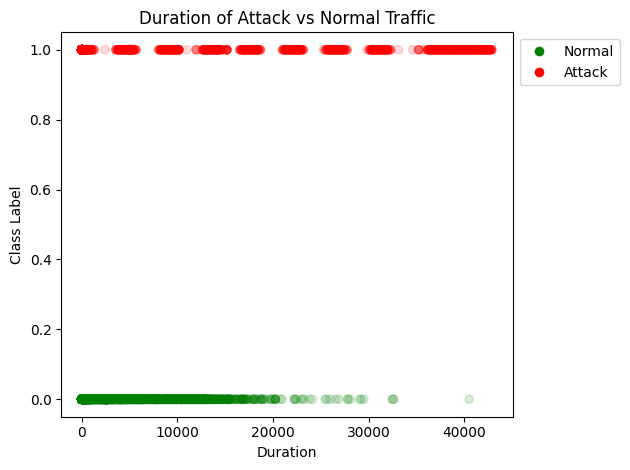

In [20]:
# Scatter plot with colors mapped based on class label
scatter = plt.scatter(df['duration'], df['class_label'],alpha=0.15, c=df['class_label'].map({0: 'green', 1: 'red'}))

plt.xlabel('Duration')
plt.ylabel('Class Label')
plt.title('Duration of Attack vs Normal Traffic')

# Create a legend specifying the colors for attack and normal, placed outside the plot
legend_labels = {0: 'Normal', 1: 'Attack'}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=8)
                   for label, color in [('Normal', 'green'), ('Attack', 'red')]]
plt.legend(handles=legend_elements, labels=legend_labels.values(), loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Ensures the legend doesn't overlap with the plot
plt.show()

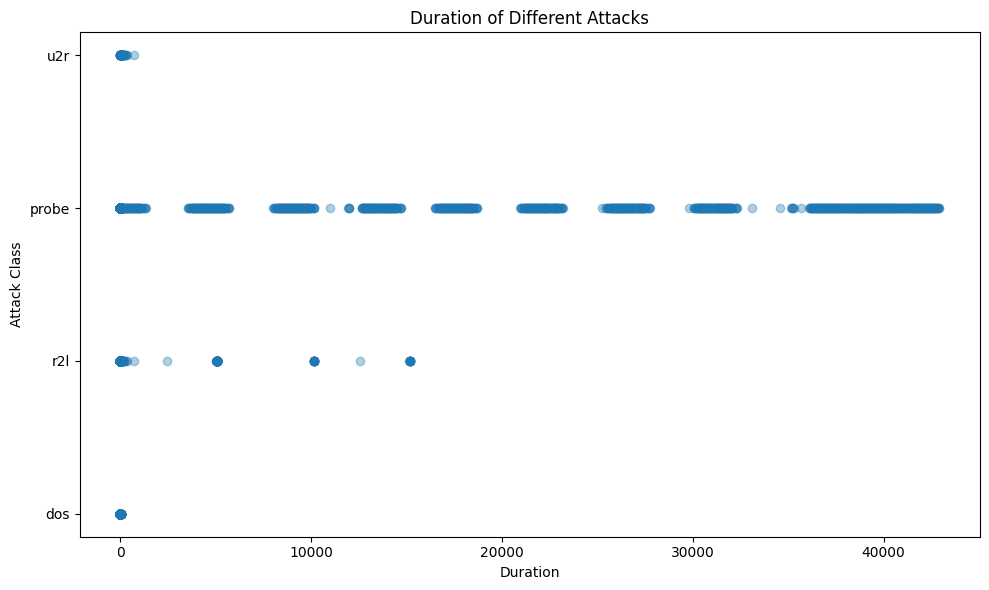

In [21]:
plt.figure(figsize=(10, 6))

# Scatter plot with colors mapped based on attack_class
scatter = plt.scatter(df_filtered['duration'], df_filtered['attack_class'], alpha=0.35, 
                      cmap='viridis')

plt.xlabel('Duration')
plt.ylabel('Attack Class')
plt.title('Duration of Different Attacks')

# # Add a colorbar to show the mapping of colors to attack classes
# cbar = plt.colorbar(scatter)
# cbar.set_label('Attack Class')

plt.tight_layout()
plt.show()

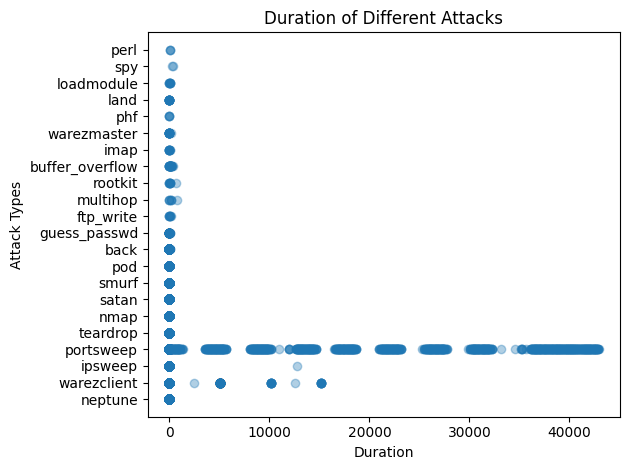

In [22]:
# Scatter plot with colors mapped based on attack_label
scatter = plt.scatter(df_filtered['duration'], df_filtered['attack_type'], alpha=0.35, 
                      cmap='viridis')

plt.xlabel('Duration')
plt.ylabel('Attack Types')
plt.title('Duration of Different Attacks')

# # Add a colorbar to show the mapping of colors to attack classes
# cbar = plt.colorbar(scatter)
# cbar.set_label('Attack Class')

plt.tight_layout()
plt.show()

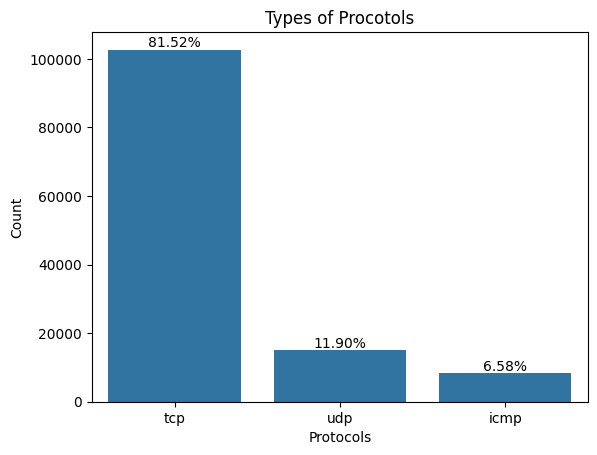

In [23]:
# Create a count plot for 'protocol type'
ax = sns.countplot(x='protocol_type', data=df)
plt.xlabel('Protocols')
plt.ylabel('Count')
plt.title('Types of Procotols')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Calculate percentages manually and annotate the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()

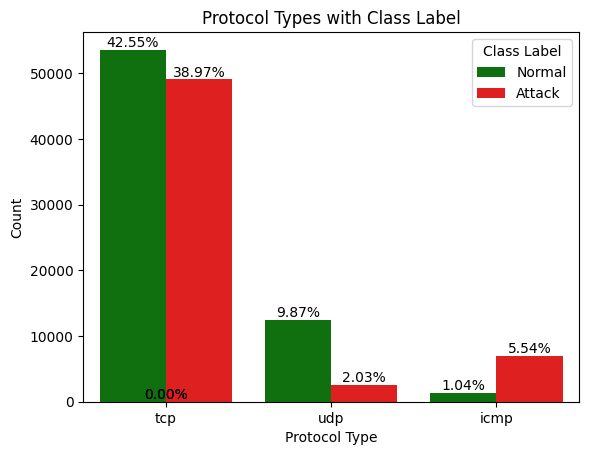

In [24]:
# Create a count plot for 'protocol type' with different colors for class labels
ax = sns.countplot(x='protocol_type', hue='class_label', data=df, palette={0: 'green', 1: 'red'})
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Protocol Types with Class Label')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.legend(title='Class Label', labels=['Normal', 'Attack'])  # Add legend for class labels

# Calculate percentages manually and annotate the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()

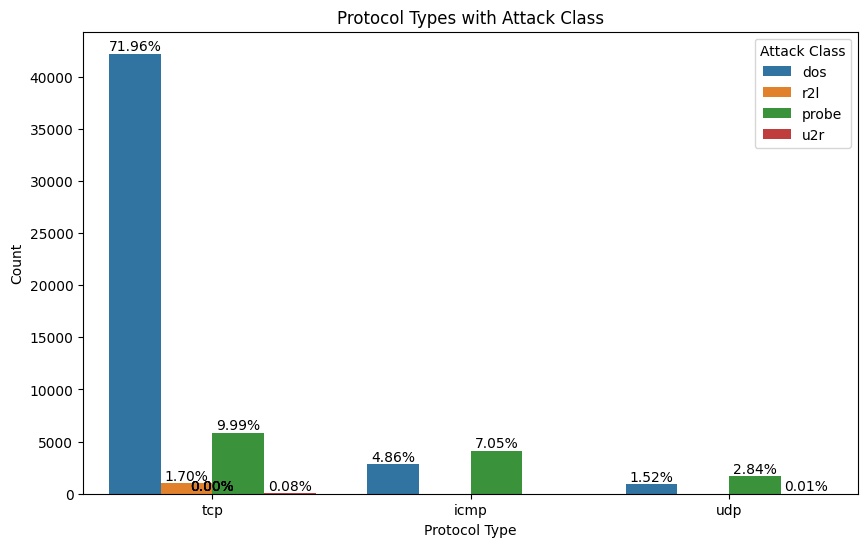

In [25]:
plt.figure(figsize=(10, 6))

# Create a count plot for 'protocol type' with different colors for attack classes
ax = sns.countplot(x='protocol_type', hue='attack_class', data=df_filtered)
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Protocol Types with Attack Class')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.legend(title='Attack Class', labels=df_filtered['attack_class'].unique())  # Add legend for attack classes

# Calculate percentages manually and annotate the bars
total = float(len(df_filtered))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()

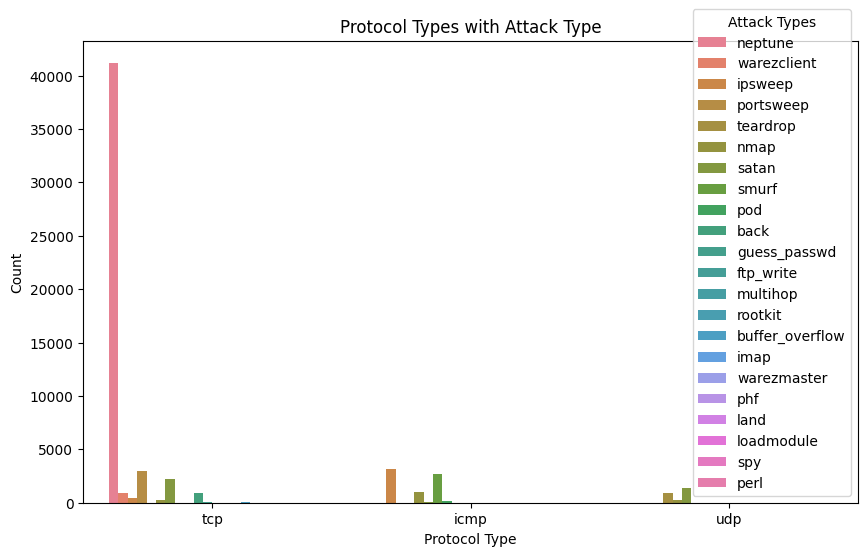

In [26]:
plt.figure(figsize=(10, 6))

# Create a count plot for 'protocol type' with different colors for attack classes
ax = sns.countplot(x='protocol_type', hue='attack_type', data=df_filtered)
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Protocol Types with Attack Type')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.legend(title='Attack Types', labels=df_filtered['attack_type'].unique())  # Add legend for attack classes

# # Calculate percentages manually and annotate the bars
# total = float(len(df_filtered))
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()

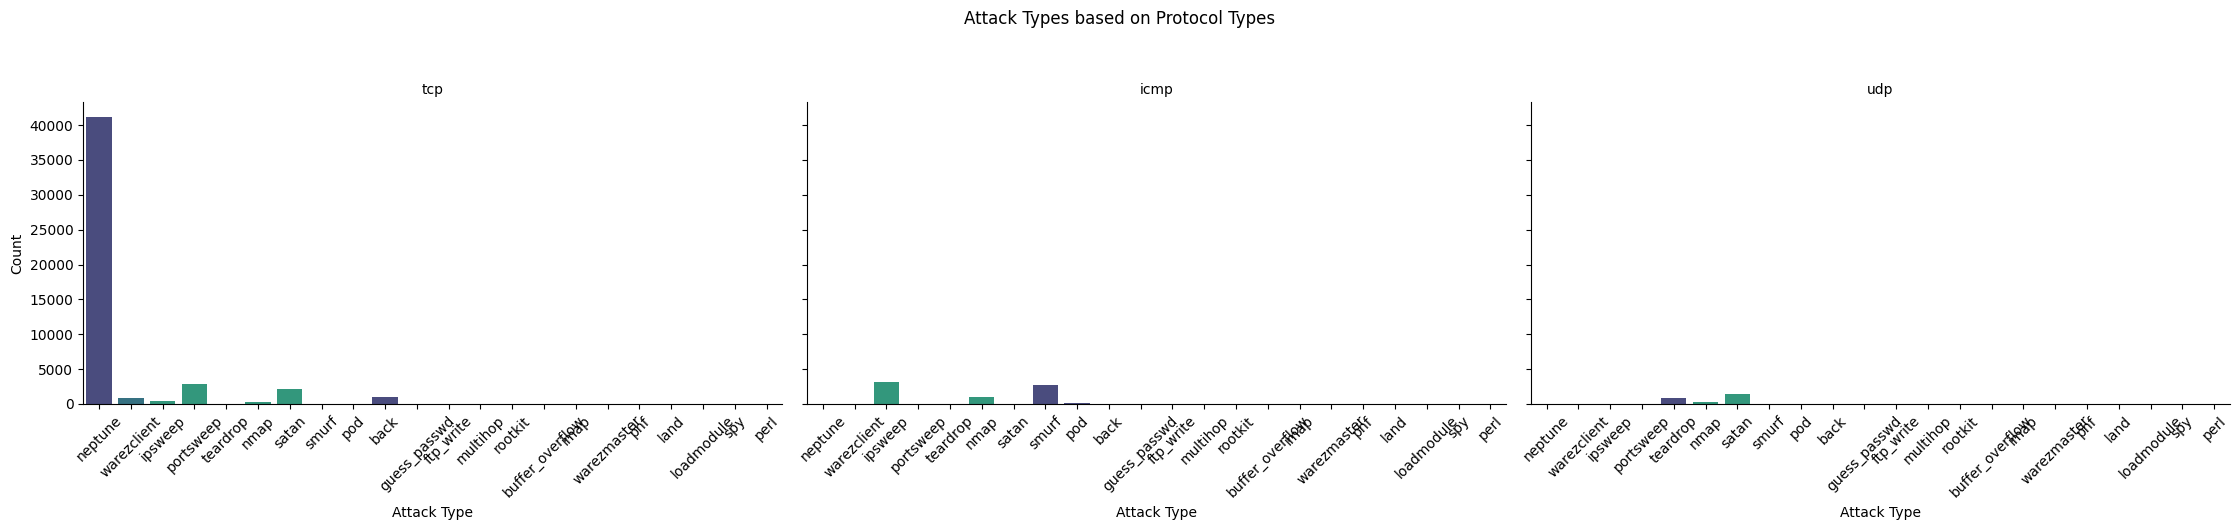

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtered DataFrames based on protocol types
tcp_data = df_filtered[df_filtered['protocol_type'] == 'tcp']
udp_data = df_filtered[df_filtered['protocol_type'] == 'udp']
icmp_data = df_filtered[df_filtered['protocol_type'] == 'icmp']

# Create a FacetGrid with specified size
g = sns.FacetGrid(df_filtered, col='protocol_type', hue='attack_class', palette='viridis', height=5, aspect=1.5)
g.map(sns.countplot, 'attack_type', order=df_filtered['attack_type'].unique()).set_titles('{col_name}')

# Set labels and titles
g.set_axis_labels('Attack Type', 'Count')
g.fig.suptitle('Attack Types based on Protocol Types', y=1.05)

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

# Adjust the plot layout
plt.tight_layout()

# Show the plots
plt.show()

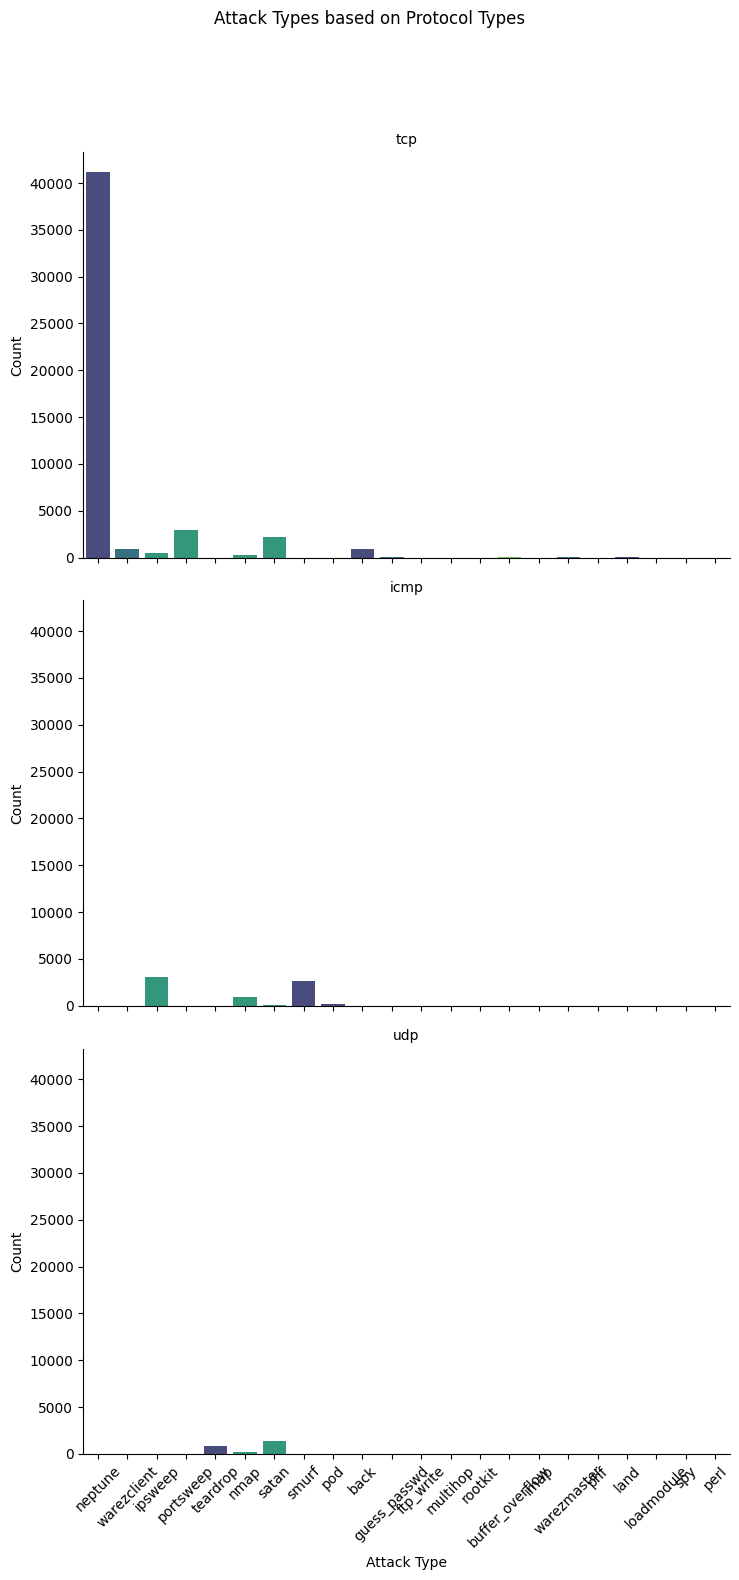

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtered DataFrames based on protocol types
tcp_data = df_filtered[df_filtered['protocol_type'] == 'tcp']
udp_data = df_filtered[df_filtered['protocol_type'] == 'udp']
icmp_data = df_filtered[df_filtered['protocol_type'] == 'icmp']

# Create a FacetGrid with specified size and vertical stacking
g = sns.FacetGrid(df_filtered, row='protocol_type', hue='attack_class', palette='viridis', height=5, aspect=1.5)
g.map(sns.countplot, 'attack_type', order=df_filtered['attack_type'].unique()).set_titles('{row_name}')

# Set labels and titles
g.set_axis_labels('Attack Type', 'Count')
g.fig.suptitle('Attack Types based on Protocol Types', y=1.05)

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

# Adjust the plot layout
plt.tight_layout()

# Show the plots
plt.show()

In [29]:
#df.service.value_counts().count()
unique_service = df['service'].value_counts()
print("Number of unique service : ",unique_service.shape[0])
print(unique_service.head())

Number of unique service :  70
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


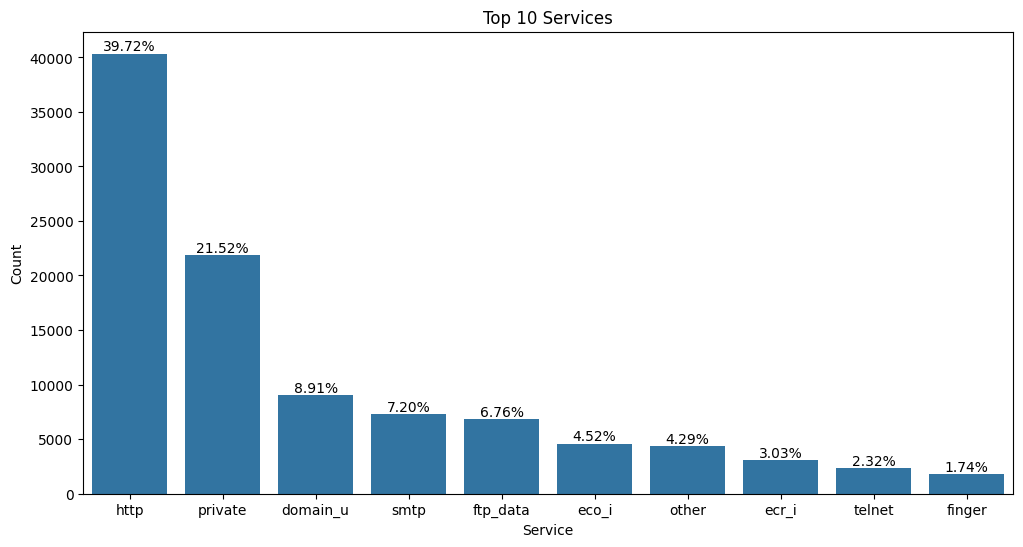

In [30]:
plt.figure(figsize=(12, 6))
top_services = df['service'].value_counts().head(10)  # Consider top 10 services for illustration
ax = sns.barplot(y=top_services.values, x=top_services.index)
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Top 10 Services')

# Calculate percentages manually and annotate the bars
total = top_services.sum()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()

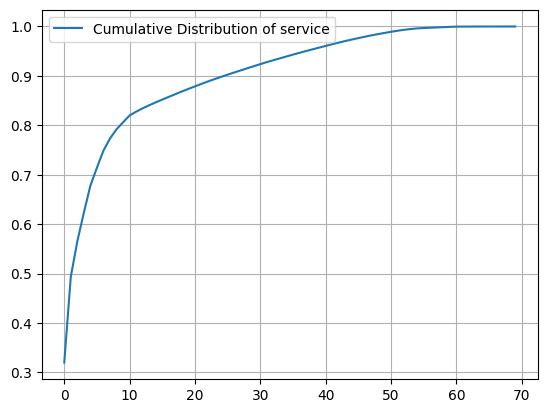

In [31]:
s = sum(unique_service.values)
h = unique_service.values/s
c = np.cumsum(h)
plt.plot(c , label = "Cumulative Distribution of service")
plt.grid()
plt.legend()
plt.show()

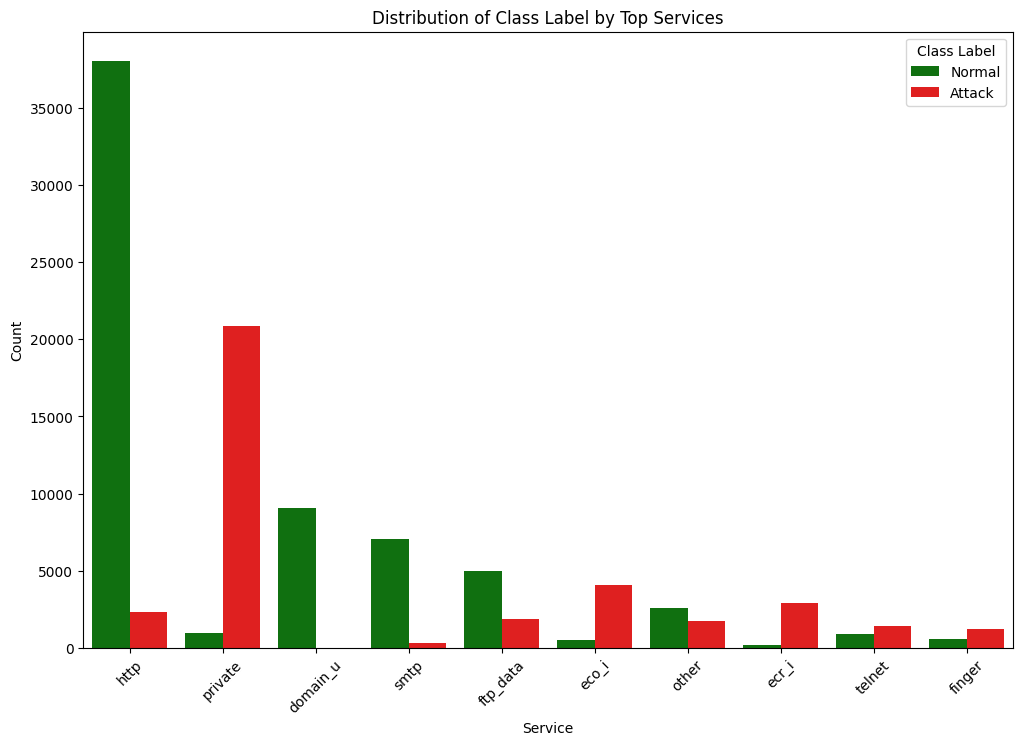

In [32]:
# Filter the DataFrame to consider top services
top_services = df['service'].value_counts().head(10)  # Consider top 10 services for illustration
top_services_list = top_services.index.tolist()
df_top_services = df[df['service'].isin(top_services_list)]

plt.figure(figsize=(12, 8))

# Create a count plot for 'service' with hue as 'class_label' and sort by count
sns.countplot(x='service', hue='class_label', data=df_top_services,
              palette={0: 'green', 1: 'red'},
              order=df_top_services['service'].value_counts().index)  # Sort by count

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Class Label by Top Services')
plt.xticks(rotation=45)
plt.legend(title='Class Label', labels=['Normal', 'Attack'])

plt.show()

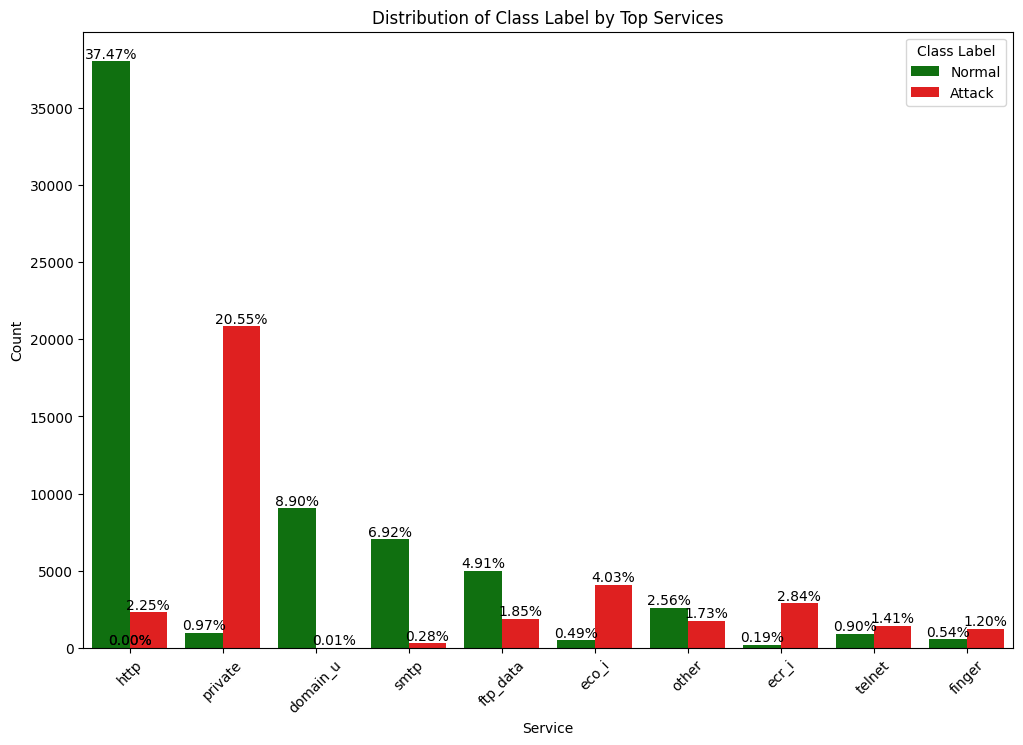

In [33]:
# Filter the DataFrame to consider top services
top_services = df['service'].value_counts().head(10)  # Consider top 10 services for illustration
top_services_list = top_services.index.tolist()
df_top_services = df[df['service'].isin(top_services_list)]

plt.figure(figsize=(12, 8))

# Create a count plot for 'service' with hue as 'class_label' and sort by count
ax = sns.countplot(x='service', hue='class_label', data=df_top_services,
                   palette={0: 'green', 1: 'red'},
                   order=df_top_services['service'].value_counts().index)  # Sort by count

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Class Label by Top Services')
plt.xticks(rotation=45)
plt.legend(title='Class Label', labels=['Normal', 'Attack'])

# Calculate percentages manually and annotate the bars
total = len(df_top_services)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()

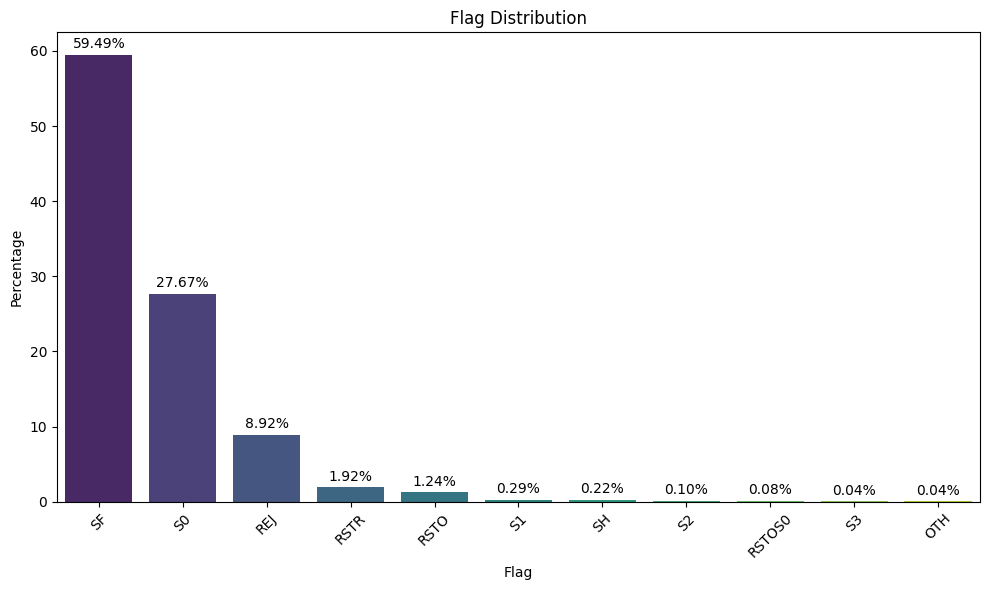

In [34]:
# Calculate flag counts and percentages
flag_counts = df['flag'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

# Create a bar plot for flag distribution
ax = sns.barplot(x=flag_counts.index, y=flag_counts.values, palette='viridis')
plt.xlabel('Flag')
plt.ylabel('Percentage')
plt.title('Flag Distribution')

# Annotate the bars with percentages
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}%', ha='center', va='bottom', color='black')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

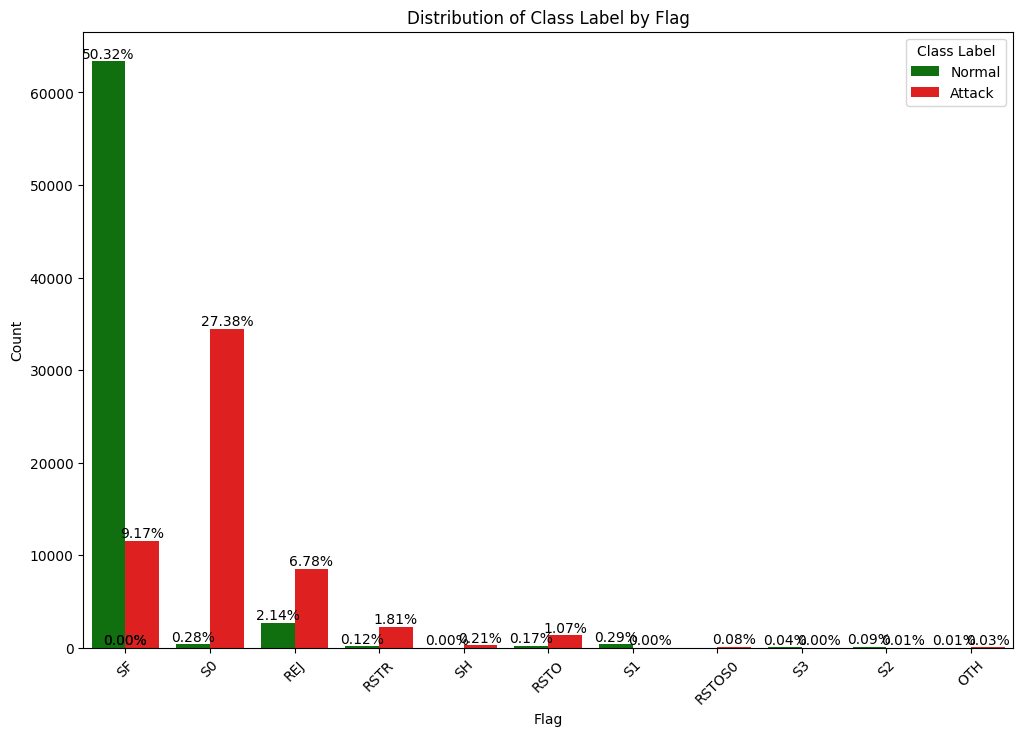

In [35]:
plt.figure(figsize=(12, 8))

# Create a count plot for 'flag' with hue as 'class_label'
ax = sns.countplot(x='flag', hue='class_label', data=df, palette={0: 'green', 1: 'red'})
plt.xlabel('Flag')
plt.ylabel('Count')
plt.title('Distribution of Class Label by Flag')

plt.xticks(rotation=45)
plt.legend(title='Class Label', labels=['Normal', 'Attack'])

# Calculate total counts for annotation
total_counts = len(df)

# Annotate each bar with its percentage
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height / total_counts) * 100:.2f}%', 
            ha='center', va='bottom')

plt.show()

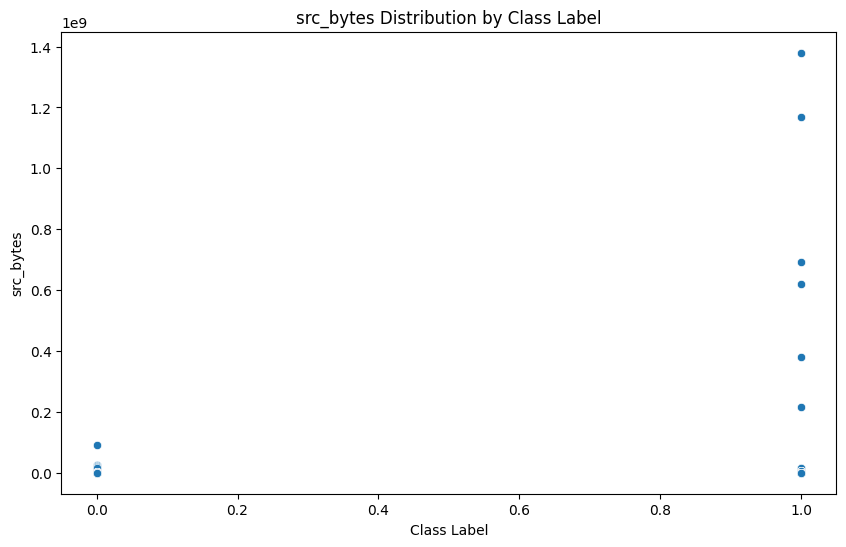

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='class_label', y='src_bytes', data=df, palette={0: 'green', 1: 'red'})
plt.xlabel('Class Label')
plt.ylabel('src_bytes')
plt.title('src_bytes Distribution by Class Label')
plt.show()

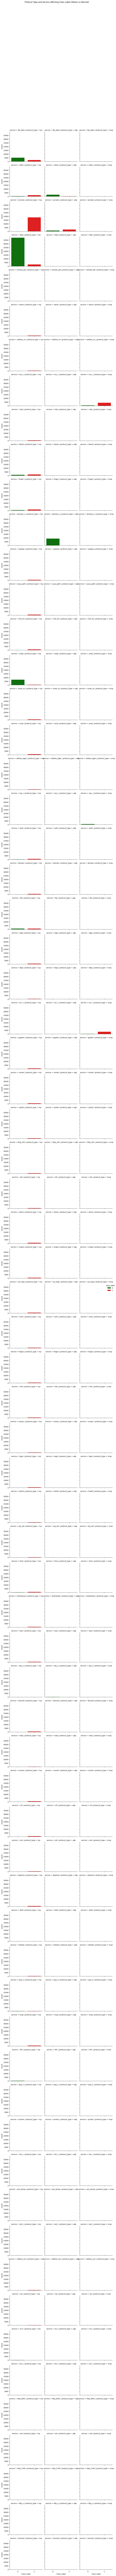

In [37]:
# Create a FacetGrid to plot the relationship between protocol_type, service, and class_label
g = sns.FacetGrid(df, col='protocol_type', row='service', hue='class_label', palette={0: 'green', 1: 'red'})
g.map(sns.countplot, 'class_label').add_legend()

# Set labels and titles
g.set_axis_labels('Class Label', 'Count')
g.fig.suptitle('Protocol Type and Service affecting Class Label (Attack vs Normal)', y=1.05)

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

# Adjust the plot layout
plt.tight_layout()

# Show the plots
plt.show()

In [38]:
df_numerical = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)

In [39]:
# find the correlation coefficient between the numerical variables with class label and make it absolute
corr = abs(df_numerical.corr()['class_label']).sort_values(ascending=False)
#print(corr)

#pick only correlation values greater than 0.5
corr = corr[corr > 0.5]
print(corr)

class_label                 1.000000
same_srv_rate               0.751913
dst_host_srv_count          0.722535
dst_host_same_srv_rate      0.693803
logged_in                   0.690171
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
srv_serror_rate             0.648289
count                       0.576444
Name: class_label, dtype: float64


['class_label', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'serror_rate', 'srv_serror_rate', 'count']


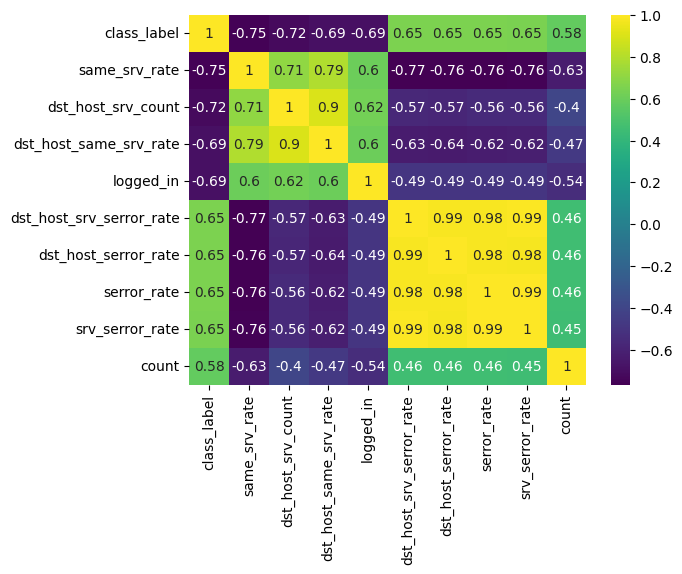

In [40]:
#now save the above correlation values in a list and check for direct and inverse relation between the variables wrt class label
corr_list = corr.index.tolist()
print(corr_list)

#now plot the correlation matrix
#plt.figure(figsize=(15,15))
sns.heatmap(df_numerical[corr_list].corr(), annot=True, cmap='viridis')
plt.show()

In [41]:
#do one hot encoding for the categorical variables and check its correlation with class label
df_categorical = pd.get_dummies(df_categorical, drop_first=True)
df_categorical.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_type_buffer_overflow,attack_type_ftp_write,attack_type_guess_passwd,attack_type_imap,attack_type_ipsweep,attack_type_land,attack_type_loadmodule,attack_type_multihop,attack_type_neptune,attack_type_nmap,attack_type_normal,attack_type_perl,attack_type_phf,attack_type_pod,attack_type_portsweep,attack_type_rootkit,attack_type_satan,attack_type_smurf,attack_type_spy,attack_type_teardrop,attack_type_warezclient,attack_type_warezmaster,attack_class_normal,attack_class_probe,attack_class_r2l,attack_class_u2r
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [42]:
#now concatenate the numerical and categorical variables
df_new = pd.concat([df_numerical, df_categorical], axis=1)
df_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,class_label,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_type_buffer_overflow,attack_type_ftp_write,attack_type_guess_passwd,attack_type_imap,attack_type_ipsweep,attack_type_land,attack_type_loadmodule,attack_type_multihop,attack_type_neptune,attack_type_nmap,attack_type_normal,attack_type_perl,attack_type_phf,attack_type_pod,attack_type_portsweep,attack_type_rootkit,attack_type_satan,attack_type_smurf,attack_type_spy,attack_type_teardrop,attack_type_warezclient,attack_type_warezmaster,attack_class_normal,attack_class_probe,attack_class_r2l,attack_class_u2r
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [43]:
#now find the correlation between the new dataframe and class label
corr = abs(df_new.corr()['class_label']).sort_values(ascending=False)
corr = corr[corr > 0.5]
# corr_list = corr.index.tolist()
# print(corr_list)
corr

attack_class_normal         1.000000
attack_type_normal          1.000000
class_label                 1.000000
flag_SF                     0.756286
same_srv_rate               0.751913
attack_type_neptune         0.747336
dst_host_srv_count          0.722535
dst_host_same_srv_rate      0.693803
logged_in                   0.690171
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
flag_S0                     0.650206
srv_serror_rate             0.648289
count                       0.576444
service_http                0.562312
Name: class_label, dtype: float64

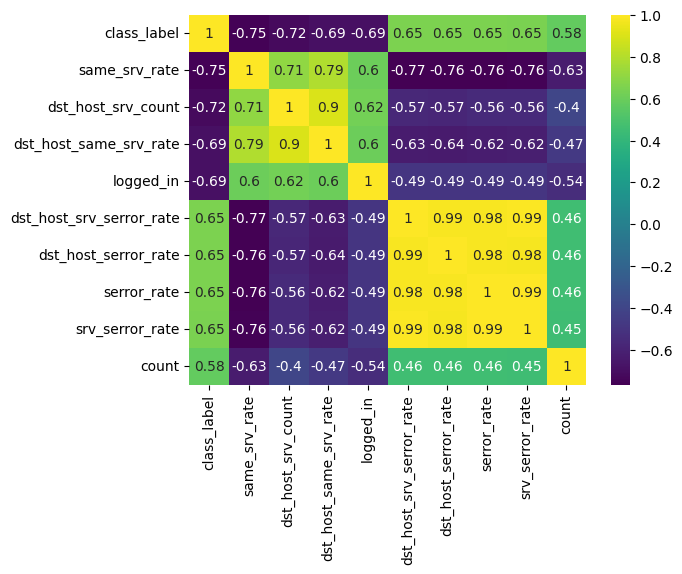

In [44]:
#now plot the correlation matrix
#plt.figure(figsize=(15,15))
sns.heatmap(df_new[corr_list].corr(), annot=True, cmap='viridis')
plt.show()

In [45]:
df_numerical = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)


#label encoding for the categorical variables in df data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_e_categorical = df_categorical.apply(le.fit_transform)
#df_e_categorical.head()

#normalize the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_n_numerical = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)


#concat the encoded and normalized datasets
df_ne = pd.concat([df_n_numerical, df_e_categorical], axis=1)
#df_ne.head()

#drop attack_class and attack_type columns
df_ne.drop(['attack_class', 'attack_type'], axis=1, inplace=True)
df_ne.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,class_label,protocol_type,service,flag
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0.0,1,20,9
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0.0,2,44,9
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,1.0,1,49,5
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000,0.0,1,24,9
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000,0.0,1,24,9


In [46]:
#correlation matrix wrt class label and absolute values greater than 0.5 only
corr = abs(df_ne.corr()['class_label']).sort_values(ascending=False)
corr = corr[corr > 0.5]
corr

class_label                 1.000000
same_srv_rate               0.751913
dst_host_srv_count          0.722535
dst_host_same_srv_rate      0.693803
logged_in                   0.690171
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
srv_serror_rate             0.648289
flag                        0.647073
count                       0.576444
Name: class_label, dtype: float64

(88181, 41) (37792, 41) (88181,) (37792,)
16
Index(['logged_in', 'count', 'serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'level', 'protocol_type', 'service',
       'flag'],
      dtype='object')


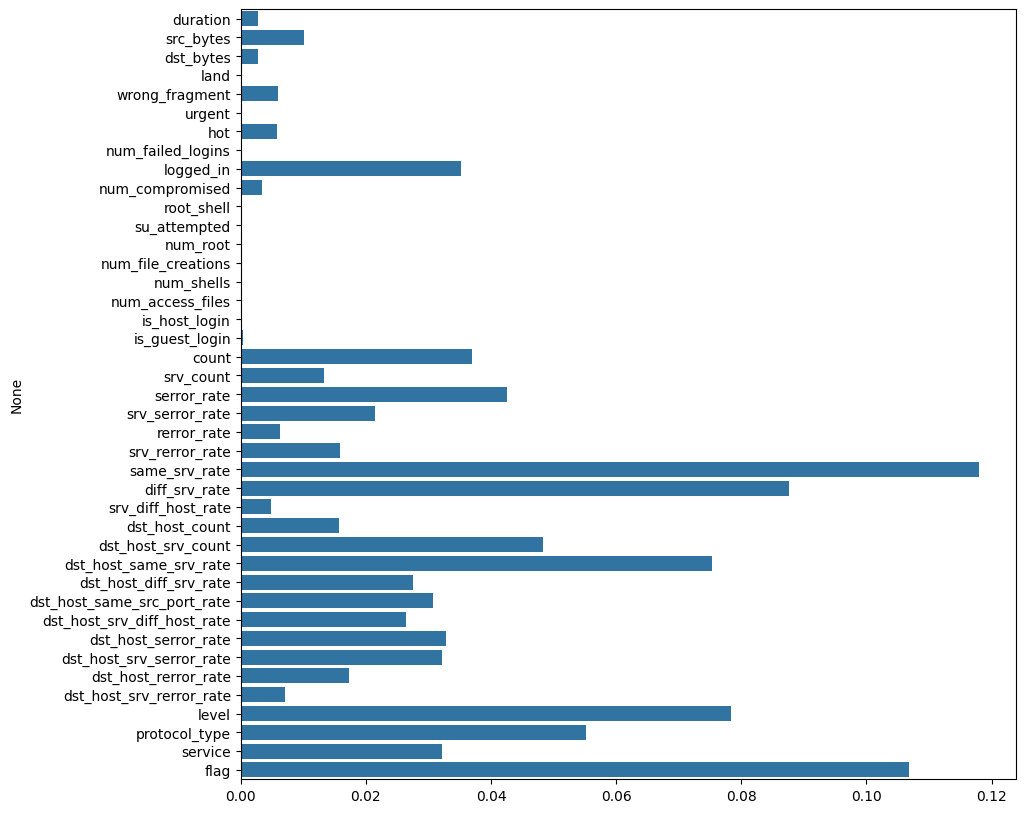

In [47]:
#perfrom random forest feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = df_ne.drop(['class_label'], axis=1)
y = df_ne['class_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#fit the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#select the features
sel = SelectFromModel(rf)
sel.fit(X_train, y_train)

#make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

#plot all the selected features
plt.figure(figsize=(10,10))
sns.barplot(x=sel.estimator_.feature_importances_, y=X_train.columns)
plt.show()

(88181, 41) (37792, 41) (88181,) (37792,)
5
Index(['same_srv_rate', 'dst_host_same_srv_rate', 'level', 'protocol_type',
       'flag'],
      dtype='object')


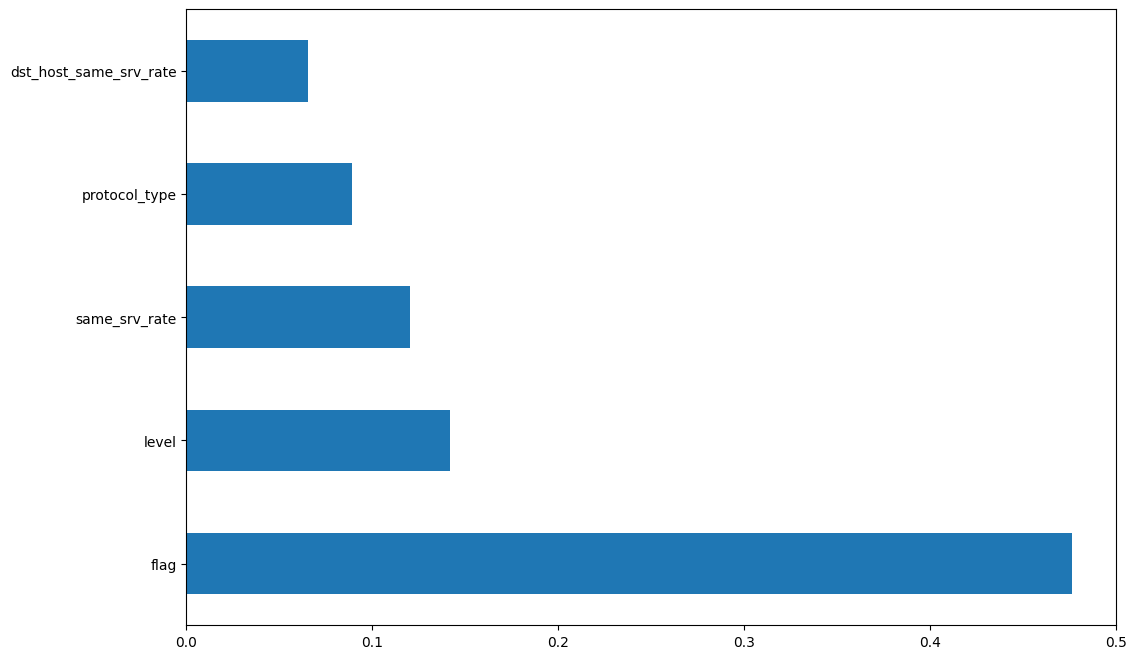

In [48]:
#best features by gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = df_ne.drop(['class_label'], axis=1)
y = df_ne['class_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#fit the model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

#select the features
sel = SelectFromModel(gb)
sel.fit(X_train, y_train)

#make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

#plot the feature importance
plt.figure(figsize=(12,8))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

In [49]:
#drop attack_class and attack_type columns
df.drop(['attack_class', 'attack_type'], axis=1, inplace=True)

In [50]:
df_numerical = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)

In [51]:
#one hot encoding of the categorical variables
df_he_categorical = pd.get_dummies(df_categorical, drop_first=True)
df_he_categorical.head()

#normalize the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_n_numerical = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

#concat the encoded and normalized datasets
df_he_n = pd.concat([df_n_numerical, df_he_categorical], axis=1)
df_he_n.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,class_label,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00

5
Index(['same_srv_rate', 'dst_host_same_srv_rate', 'level', 'protocol_type',
       'flag'],
      dtype='object')


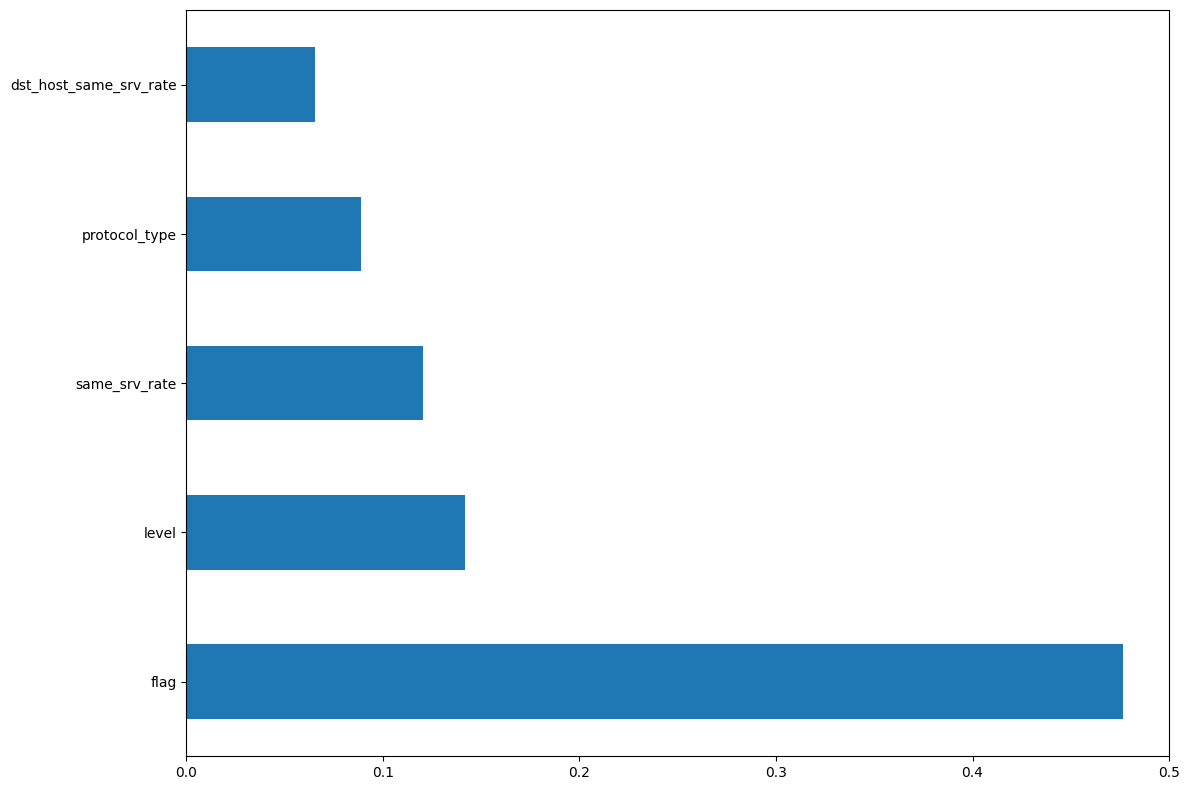

In [52]:

# fit the model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# select the features
sel = SelectFromModel(gb)
sel.fit(X_train, y_train)

# make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

# plot the feature importance
plt.figure(figsize=(12,8))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='barh')
plt.tight_layout()